# WeatherPy

## After analyzing all the data, we can come to the following conclusions:

#### Latitude vs. Max Temperature
As we travel towards the northern hemisphere, temperatures drop, and as we travel towards the southern hemisphere, temperatures drop but not as drastically as the north. When traveling towards the equator, however, we see a clear increase in max temperature; therefore there definitely is a correlation between temperature and proximity to the equator
<hr>
#### Latitude vs. Humidity
As we travel more north, we can see that humidity levels do increase overall, but there is barely a correlation, as the regressed line has a very shallow slope, indicating that relations are not as significant.
<hr>
#### Latitude vs. Cloudiness
Similarly to the humidity levels, as we travel more north, the cloudiness levels increase. This can be explained by the increase in humidity as we travel north as explained in the previous point, since cloudiness may be an indication of humidity levels. 
<hr>
#### Latitude vs. Wind Speed
It seems there is barely any correlation with traveling more north and the change in wind speed; however, as we travel towards the equator from the south, wind levels do increase a bit. However, this result is unexplainable, since the results from the northern hemisphere gives no correlative indication of a similar trend. 

In [ ]:
# pip install citipy

In [24]:
# documentation: https://openweathermap.org/current

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [26]:
# api.openweathermap.org/data/2.5/box/city?bbox={bbox}&appid={API key}
base_url = "http://api.openweathermap.org/data/2.5/box/city?"
bbox = [-90,-180,90,180]
query = f"bbox=-90,-180,90,180,10&appid={api_key}"
query_url = base_url + query
query_url

'http://api.openweathermap.org/data/2.5/box/city?bbox=-90,-180,90,180,10&appid=4ab50a943ddb66ae940d3dfa7c26d8fb'

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [28]:
city_name = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind_speed = []
country = []
date = []
for city in cities:
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = f"q={city}&appid={api_key}&units=imperial"
    query_url = base_url + query
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        
        print(weather_json["name"]) 
        
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        hum.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
    
    
# weather_json

Yellowknife
El Tigre
Hong Kong
Luwuk
Marrakesh
Lanxi
Biltine
Atuona
Busselton
Port Hardy
Longyearbyen
Żnin
Kapaa
Bluff
Provideniya
Salalah
Mataura
San Luis
Albany
Songyuan
Yemel'yanovo
Saint-Paul
Saryozek
George Town
Shimokizukuri
Tataouine
Cayenne
Ushuaia
City not found. Skipping...
City not found. Skipping...
Hermanus
Rocha
Taoudenni
Evensk
Chino Valley
Rio Grande
Udupi
Vardø
City not found. Skipping...
Arrondissement du Havre
Saint Paul Harbor
Adolfo López Mateos
Lashio
Clyde River
Zinder
City not found. Skipping...
Tura
Vao
Roblin
Lormi
Mozarlândia
Port Elizabeth
Haines Junction
Mossamedes
Beatrice
Padang
Kumul
Sirte
City not found. Skipping...
Upernavik
Dorchester
Lavrentiya
City not found. Skipping...
City not found. Skipping...
Cape Town
South Yuba City
Paamiut
Beloha
Kavaratti
Xining
Port Alfred
Punta Arenas
Owando
Lago da Pedra
Ventspils
Bathsheba
Carnarvon
Nantucket
Rikitea
Genhe
Hithadhoo
Nikolskoye
Verāval
Saskylakh
Aklavik
Zhigansk
Cidreira
San Patricio
Bongaree
Naze
Narsa

In [29]:
# Export the city data into a .csv.
# Display the DataFrame

cities_data_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
cities_data_df.to_csv(output_data_file, index=False, header=True)
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-31.00,61,90,9.22,CA,1612577603
1,El Tigre,8.8875,-64.2454,77.43,64,99,14.90,VE,1612578188
2,Hong Kong,22.2855,114.1577,70.00,72,0,4.50,HK,1612578048
3,Luwuk,-0.9516,122.7875,83.88,63,100,2.64,ID,1612578189
4,Marrakesh,31.6315,-8.0083,50.00,93,89,6.91,MA,1612578189


In [30]:
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.159169,19.680742,50.138185,74.949389,53.994764,8.023508,1.612578e+09
std,33.011757,89.762141,31.437575,18.083892,40.179644,5.654019,2.097251e+02
min,-54.800000,-179.166700,-41.490000,1.000000,0.000000,0.250000,1.612577e+09
25%,-5.041000,-56.154900,30.200000,65.000000,9.000000,3.760000,1.612578e+09
50%,22.283300,22.200000,61.030000,79.000000,67.000000,6.850000,1.612578e+09
75%,47.978100,99.184400,75.200000,88.000000,95.000000,11.410000,1.612578e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,28.990000,1.612578e+09


In [31]:
# Inspect the data and remove the cities where the humidity > 100%.
#  Get the indices of cities that have humidity over 100%.
# Int64Index([], dtype='int64')

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [33]:
# Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot


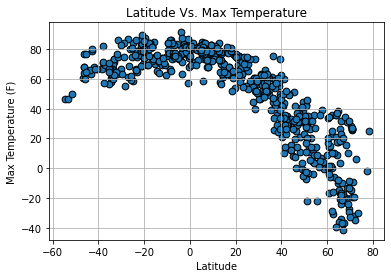

In [34]:
lat_temp_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, 
            title="Latitude Vs. Max Temperature", facecolors="blue", edgecolors="black", s=45)
lat_temp_scatter.set(xlabel="Latitude", ylabel="Max Temperature (F)")
plt.savefig("../output_data/lat_vs_temp_scatter")
plt.show()


# Latitude vs. Humidity Plot


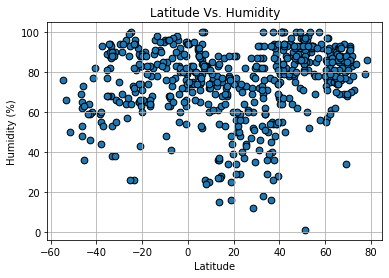

In [35]:
lat_hum_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, 
            title="Latitude Vs. Humidity", facecolors="blue", edgecolors="black", s=45)
lat_hum_scatter.set(xlabel="Latitude", ylabel="Humidity (%)")
plt.savefig("../output_data/lat_vs_hum_scatter")
plt.show()

#  Latitude vs. Cloudiness Plot


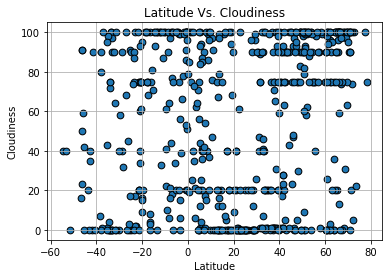

In [36]:
lat_cloud_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, 
            title="Latitude Vs. Cloudiness", facecolors="blue", edgecolors="black", s=45)
lat_cloud_scatter.set(xlabel="Latitude", ylabel="Cloudiness")
plt.savefig("../output_data/lat_vs_cloudiness_scatter")
plt.show()

# Latitude vs. Wind Speed Plot


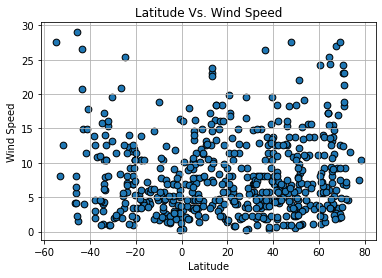

In [37]:
lat_wind_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, 
            title="Latitude Vs. Wind Speed", facecolors="blue", edgecolors="black", s=45)
lat_wind_scatter.set(xlabel="Latitude", ylabel="Wind Speed")
plt.savefig("../output_data/lat_vs_windspeed_scatter")
plt.show()

# Linear Regressions

In [39]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

north_hemi = cities_data_df.loc[cities_data_df["Lat"]>0]
north_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-31.00,61,90,9.22,CA,1612577603
1,El Tigre,8.8875,-64.2454,77.43,64,99,14.90,VE,1612578188
2,Hong Kong,22.2855,114.1577,70.00,72,0,4.50,HK,1612578048
4,Marrakesh,31.6315,-8.0083,50.00,93,89,6.91,MA,1612578189
5,Lanxi,29.2195,119.4770,56.86,82,96,0.36,CN,1612578189
...,...,...,...,...,...,...,...,...,...
564,Russell,32.3502,-85.1999,48.20,71,90,3.44,US,1612578291
566,Arlit,18.7369,7.3853,65.08,25,0,9.84,NE,1612577749
567,Jalu,29.0331,21.5482,52.20,65,0,3.40,LY,1612578273
570,Berlevåg,70.8578,29.0864,27.00,91,100,21.27,NO,1612578329


The r-value is: -0.8823229507424591


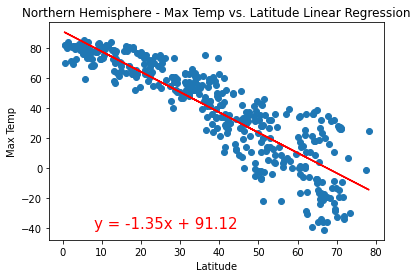

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 
north_temp = north_hemi["Max Temp"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_temp)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,-40),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/north_hemi_lat_vs_temp_reg")
plt.show()

In [41]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

south_hemi = cities_data_df.loc[cities_data_df["Lat"]<0]
south_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Luwuk,-0.9516,122.7875,83.88,63,100,2.64,ID,1612578189
7,Atuona,-9.8000,-139.0333,79.30,82,61,18.81,PF,1612578189
8,Busselton,-33.6500,115.3333,66.99,68,100,5.99,AU,1612577958
13,Bluff,-46.6000,168.3333,60.96,69,16,4.23,NZ,1612577852
16,Mataura,-46.1927,168.8643,76.46,48,50,4.14,NZ,1612578191
...,...,...,...,...,...,...,...,...,...
561,Amahai,-3.3333,128.9167,87.48,60,6,2.75,ID,1612578307
565,Talca,-35.4333,-71.6667,64.40,77,0,4.61,CL,1612578328
568,Richards Bay,-28.7830,32.0377,74.73,90,90,2.13,ZA,1612577979
569,Marau,-28.4492,-52.2000,55.00,94,32,2.44,BR,1612578328


The r-value is: 0.5047325048163065


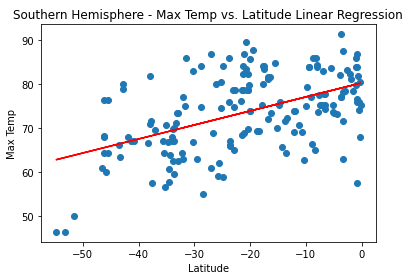

In [42]:
south_temp = south_hemi["Max Temp"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_temp)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/south_hemi_lat_vs_temp_reg")
plt.show()

The r-value is: 0.2824990771325286


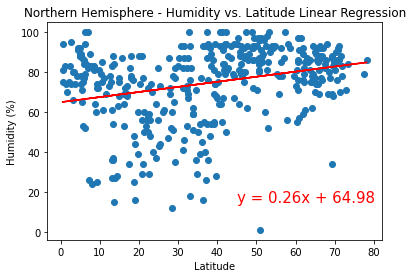

In [43]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

north_hum = north_hemi["Humidity"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_hum)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/north_hemi_lat_vs_hum_reg")
plt.show()

The r-value is: 0.2835219132364072


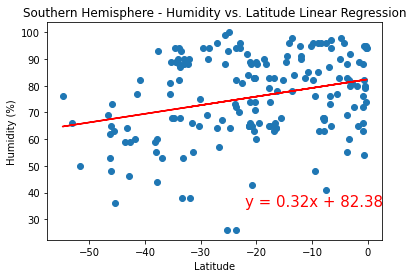

In [44]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

south_hum = south_hemi["Humidity"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_hum)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-22,35),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")


print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/south_hemi_lat_vs_hum_reg")
plt.show()

The r-value is: 0.3207273264801953


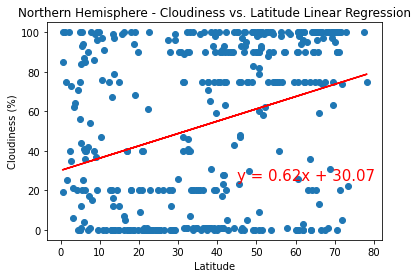

In [45]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

north_cloud = north_hemi["Cloudiness"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_cloud)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/north_hemi_lat_vs_cloud_reg")
plt.show()

The r-value is: 0.28243455115615235


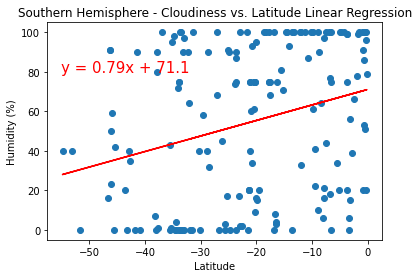

In [46]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


south_cloud = south_hemi["Cloudiness"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_cloud)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


print(f"The r-value is: {(rvalue)}")

plt.savefig("../output_data/south_hemi_lat_vs_cloud_reg")
plt.show()

The r-value is: 0.07729632302685696


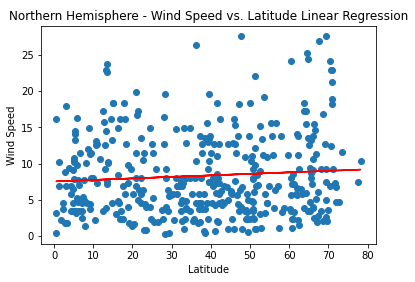

In [47]:
#  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

north_wind = north_hemi["Wind Speed"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_wind)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

print(f"The r-value is: {(rvalue)}")

plt.savefig("../output_data/north_hemi_lat_vs_wind_reg")
plt.show()

The r-value is: -0.3651623912177868


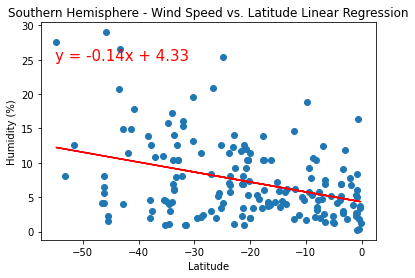

In [48]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

south_wind = south_hemi["Wind Speed"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_wind)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")


print(f"The r-value is: {(rvalue)}")

plt.savefig("../output_data/south_hemi_lat_vs_wind_reg")
plt.show()